# Can You Make It Home in Time for Pancakes? (2024.01.19)

link: https://thefiddler.substack.com/p/can-you-make-it-home-in-time-for

## I. Puzzle

Three siblings are at a playground: Alice, Bob, and Carey. Alice, the oldest, gets a call from their dad—their pancake dinner is ready! But they won’t get to eat until all three kids are home.They each walk home at a different constant speed. Alice can walk home in 10 minutes, Bob can do it in 20, and Carey in 30. Fortunately, any of the kids can carry any of the others on their back without reducing their own walking speed. (However, none of them can carry a kid who is, in turn, carrying another kid.) Assume that they can pick someone up, set someone down, and change direction instantaneously.What is the fastest they can all get home? (Your answer should be in minutes.)

# II. Solution

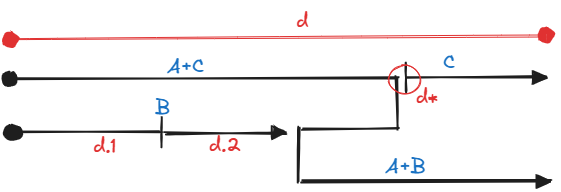

In [4]:
from IPython import display
display.Image("files/drawing.png")

We define the distance $d$ as 1. Further we measure the speed $s$ in $[d/min]$ so that Alice, Bob and Carey have a walking speed of $1/10$, $1/20$ and $1/30$, respectively.

We are searching for a point $d^*$ where Alice set down Carey and goes back to pick up Bob. The time for Carey to get from that point $d^*$ home should be equal to the time Alice needs to go back to Bob and together get home:
$$\frac{1-d^*}{s_c}= \frac{d^*-d_1-d_2}{s_a}+\frac{d-d_1-d_2}{s_a}$$
$$d^*=\frac{1}{2}(1+d_1+d_2)$$

Variable $d_1$ is the distance Bob can walk until Alice and Caray reach point $d^*$. Therefore

$$d_1 = \frac{d^*}{s_a} \cdot s_b = \frac{1}{2} d^*$$
Variable $d_2$ is the distance between $d_1$ and the point Bob meets Alice on her way back to pick him up:
$$d_2 = (d^*-d_1) \cdot \frac{s_b}{s_a+s_b}=\frac{1}{6} d^*$$
Put everything together we get:
$$d^*=\frac{1}{2}(1+\frac{1}{2} d^*+\frac{1}{6} d^*)$$
$$d^*=\frac{3}{4}$$

**Answer:** The time for all three kids to get home is $3/4 \cdot 10 + 1/4 \cdot 30 = 15 \:[min]$.


In [10]:
# Check the calculation

import sympy as sp

d_0, d_1, d_2 = sp.symbols('d_0 d_1 d_2')

exp1 = sp.Eq(30* (1-d_0), 10*(d_0-d_1-d_2)+10*(1-d_1-d_2))
exp2 = sp.Eq(d_1, 0.5 * d_0)
exp3 = sp.Eq(d_2, 1/3 * (d_0-d_1))

solution = sp.solve([exp1, exp2, exp3], (d_0, d_1, d_2))
solution


{d_0: 0.750000000000000, d_1: 0.375000000000000, d_2: 0.125000000000000}

In [12]:
import numpy as np
import matplotlib.pyplot as plt

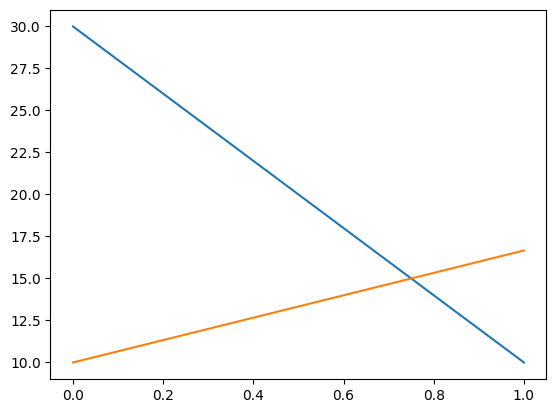

In [13]:
d = np.linspace(0,1,100)
t_c = 10 * d + 30 * (1-d)
t_b = 20/3 * d + 10

plt.plot(d,t_c)
plt.plot(d,t_b)